In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the size of the input (28x28 images, flattened to 784)
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)

# Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
x_train = x_train.reshape((len(x_train), 28 * 28))  # Flatten 28x28 images
x_test = x_test.reshape((len(x_test), 28 * 28))

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          validation_data=(x_test, x_test))



Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 2.2994e-04 - loss: 0.1740 - val_accuracy: 0.0010 - val_loss: 7.1311e-05
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 8.9402e-04 - loss: 6.0725e-05 - val_accuracy: 0.0015 - val_loss: 5.8011e-05
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.0014 - loss: 5.7596e-05 - val_accuracy: 0.0020 - val_loss: 5.7626e-05
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.0014 - loss: 5.7398e-05 - val_accuracy: 0.0020 - val_loss: 5.7588e-05
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.0016 - loss: 5.7473e-05 - val_accuracy: 6.0000e-04 - val_loss: 5.7578e-05


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


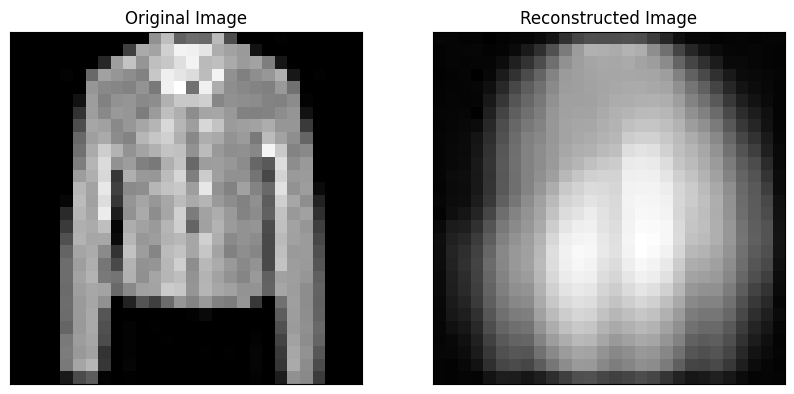

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted

# Plot the original image
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))  # Original test image
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))  # Reconstructed image
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.0015 - loss: 5.7413e-05 - val_accuracy: 0.0013 - val_loss: 5.7596e-05
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.0013 - loss: 5.7494e-05 - val_accuracy: 0.0014 - val_loss: 5.7580e-05
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.0012 - loss: 5.7370e-05 - val_accuracy: 0.0013 - val_loss: 5.7602e-05
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.0011 - loss: 5.7577e-05 - val_accuracy: 0.0019 - val_loss: 5.7621e-05
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.0011 - loss: 5.7380e-05 - val_accuracy: 0.0011 - val_loss: 5.7580e-05
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.0013 - loss: 5.7444e-05 - val_accuracy: 0.0014 - val_loss: 5.7575e-05
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.0010 - loss: 5.7463e-05 - val_accuracy: 0.0011 - val_loss: 5.7583e-05
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━

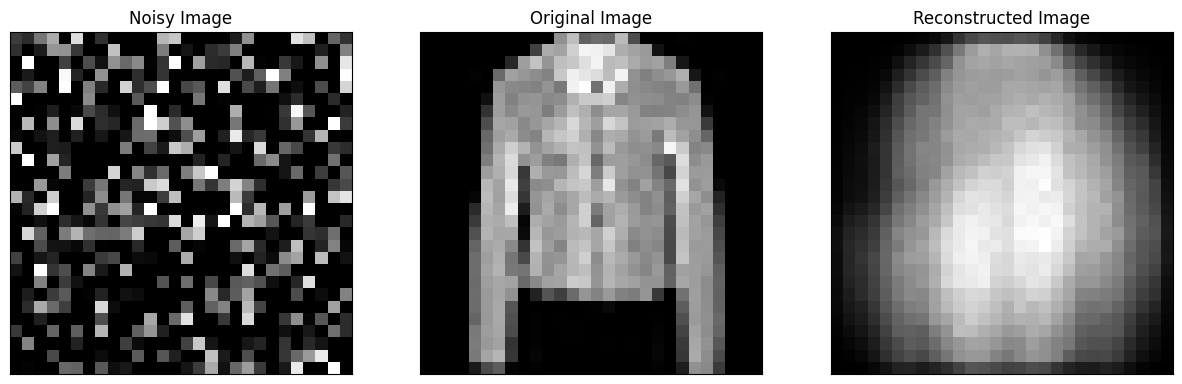

In [ ]:
import numpy as np

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# Train the model with noisy input and clean output
denoising_autoencoder = Model(input_img, decoded)

# Compile the model
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with noisy input and clean output
history_denoise = denoising_autoencoder.fit(x_train_noisy, x_train,
                                            epochs=10,
                                            batch_size=256,
                                            validation_data=(x_test_noisy, x_test))
# Predict the denoised images
reconstructed_imgs_denoise = denoising_autoencoder.predict(x_test_noisy)

# Plot the noisy image
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))  # Noisy image
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the original clean image
ax = plt.subplot(1, 3, 2)
plt.imshow(x_test[n].reshape(28, 28))  # Original image
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the denoised (reconstructed) image
ax = plt.subplot(1, 3, 3)
plt.imshow(reconstructed_imgs_denoise[n].reshape(28, 28))  # Denoised image
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.0012 - loss: 5.7323e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5482
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.0011 - loss: 5.7233e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5394
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.0013 - loss: 5.7202e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5342
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.0010 - loss: 5.7215e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5628
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.0011 - loss: 5.7226e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5374
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.0013 - loss: 5.7156e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5445
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.0011 - loss: 5.7214e-05 - val_accuracy: 0.0000e+00 - val_loss: 2.5458
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━

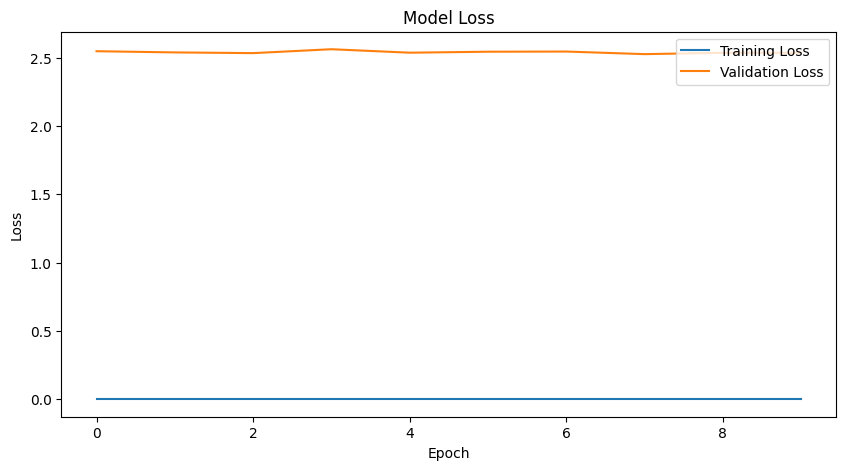

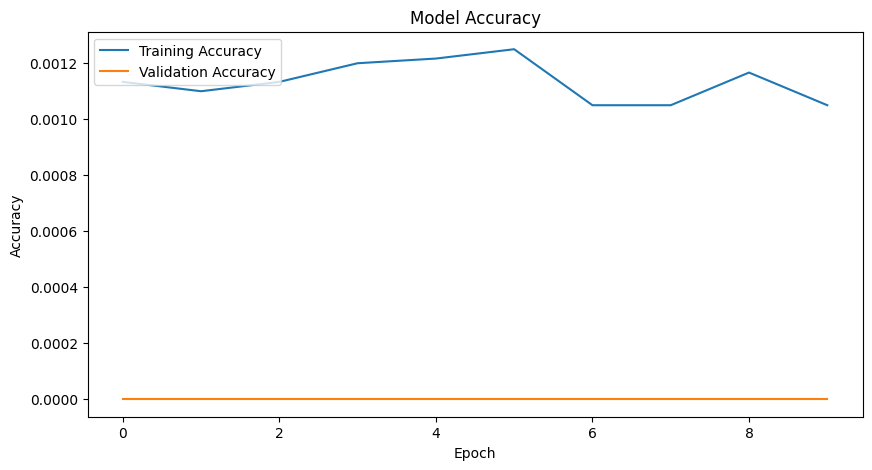

In [ ]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()